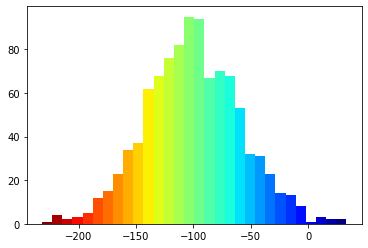

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def randn(n, sigma, mu):
    return sigma * np.random.randn(n) + mu

x = randn(1000, 40., -100.)

cm = plt.cm.get_cmap("jet") # twilight_shifted
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
_, bins, patches = ax.hist(x,color="r",bins=30)
bin_centers = 0.5*(bins[:-1]+bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cm(1 - c))
#plt.savefig("b.png", dpi=300, bbox_inches="tight")

## Bias in shift of visual cells - influence of proprioceptive input?

This could mean that at the time of place field memory formation both path integration (e.g. distance from the wall) and visual inputs were active, resulting in place field shift / blur due to early / late activity of one or another input. 

Resulting in place field extension (.. % of cells) and shrinkage (.. % of cells)

Sould this be analysed separately for 30 / 5-5 arena move conditions?

## Ratio between visually- and self-motion driven fields

In [15]:
idxs = get_idxs_by_quality(shift_A_B_all)
dataset = shift_A_B_all[idxs]

idxs_vpc = get_idxs_by_shift_range(dataset, -0.075, 0.075)  # 0    +- 1 SD
idxs_bpc = get_idxs_by_shift_range(dataset, 0.225, 0.375)   # 0.3  +- 1 SD
idxs_mmpc = get_idxs_by_shift_range(dataset, 0.075, 0.225)  # 0.15 +- 1 SD

units_vpc = dataset[idxs_vpc]
units_bpc = dataset[idxs_bpc]
units_mmpc = dataset[idxs_mmpc]

l = float(len(dataset))

total = float(len(units_vpc) + len(units_mmpc) + len(units_bpc))
total_non_mm = float(len(units_vpc) + len(units_bpc))

# percent of VPCs, percent of BPCs, number of VPCs, number of BPCs
len(units_vpc), len(units_mmpc), len(units_bpc), len(units_vpc)/l, len(units_mmpc)/l, len(units_bpc)/l

(235, 357, 254, 0.2476290832455216, 0.3761854583772392, 0.26765015806111697)

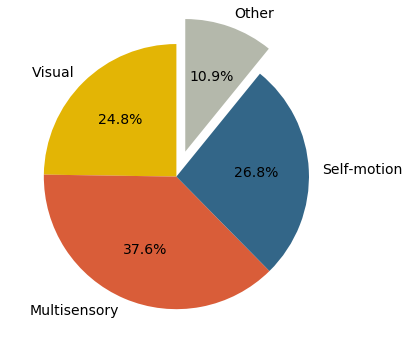

In [17]:
data = [len(units_vpc), len(units_mmpc), len(units_bpc), len(dataset) - total]
labels = 'Visual', 'Multisensory', 'Self-motion', 'Other'
colors = [COLORS['d'], COLORS['b'], COLORS['a'], COLORS['f']]
explode = (0, 0, 0, 0.2)

fig = figure(figsize=(5, 5))
ax = fig.add_subplot(111)

wedges, labels, autopct = ax.pie(data, explode=explode, colors=colors, labels=labels, \
             autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90)
for lab in labels:
    lab.set_fontsize(14)

fig.tight_layout()

#filename = "vSHIFT_grous_pie_physical.png"
#fig.savefig(os.path.join(os.path.join(paper), filename))

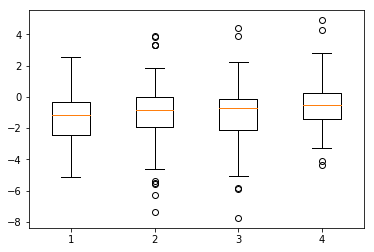

In [58]:
# change in firing rate depending on the shift, for fields that can be tracked between light and dark
shift_bins = np.arange(-0.075, 0.375, 0.1)

diff_groups = []
for i, bin_l in enumerate(shift_bins[:-1]):
    frs = PFRs[(PFRs[:, 4] > shift_bins[i]) & (PFRs[:, 4] < shift_bins[i+1])]
    x_vals = (frs[:, 0] + frs[:, 1]) / 2
    y_vals = (frs[:, 2] + frs[:, 3]) / 2
    diffs = y_vals - x_vals    
    diff_groups.append(diffs)
    
diff_groups = np.array(diff_groups)
res = plt.boxplot(diff_groups)

## Larger fields in the middle of the arena FIXME compute that in DARK for 0.3 shifts only!

results: less precision in absence of tactile stimuli

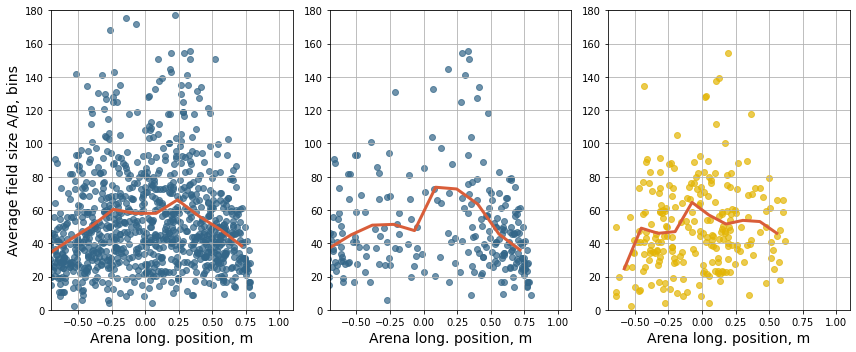

In [80]:
fig = figure(figsize=(12, 5))
st_bins = 10

idxs = get_idxs_by_quality(shift_A_B_all)
pos = (np.array(shift_A_B_all[idxs]['COMa_y']) + np.array(shift_A_B_all[idxs]['COMb_y'])) / 2
sizes = (np.array(shift_A_B_all[idxs]['size_A']) + np.array(shift_A_B_all[idxs]['size_B'])) / 2

# scatter of fields
ax = fig.add_subplot(131)
ax.set_xlim(-0.7, 1.1)
ax.set_ylim(0, 180)
ax.set_xlabel('Arena long. position, m', fontsize=14)
ax.set_ylabel('Average field size A/B, bins', fontsize=14)
ax.scatter(pos, sizes, alpha=0.7, color=COLORS['a'], label='Original')
ax.grid()

# binned statistic
st, edges, bin_no = stats.binned_statistic(pos, sizes, bins=st_bins)
x_vals = np.array(edges[:-1]) + np.abs((edges[1] - edges[0]))/2
ax.plot(x_vals, st, linewidth=3, color=COLORS['b'])


idxs_30 = get_idxs_by_shift_range(shift_A_B_all, 0.225, 0.375)
pos = (np.array(shift_A_B_all[idxs & idxs_30]['COMa_y']) + np.array(shift_A_B_all[idxs & idxs_30]['COMb_y'])) / 2
sizes = (np.array(shift_A_B_all[idxs & idxs_30]['size_A']) + np.array(shift_A_B_all[idxs & idxs_30]['size_B'])) / 2

# scatter of fields
ax = fig.add_subplot(132)
ax.set_xlim(-0.7, 1.1)
ax.set_ylim(0, 180)
ax.set_xlabel('Arena long. position, m', fontsize=14)
ax.scatter(pos, sizes, alpha=0.7, color=COLORS['a'], label='Original')
ax.grid()

# binned statistic
st, edges, bin_no = stats.binned_statistic(pos, sizes, bins=st_bins)
x_vals = np.array(edges[:-1]) + np.abs((edges[1] - edges[0]))/2
ax.plot(x_vals, st, linewidth=3, color=COLORS['b'])



idxs_0 = get_idxs_by_shift_range(shift_A_B_all, -0.075, 0.075)
pos = (np.array(shift_A_B_all[idxs & idxs_0]['COMa_y']) + np.array(shift_A_B_all[idxs & idxs_0]['COMb_y'])) / 2
sizes = (np.array(shift_A_B_all[idxs & idxs_0]['size_A']) + np.array(shift_A_B_all[idxs & idxs_0]['size_B'])) / 2

# scatter of fields
ax = fig.add_subplot(133)
ax.set_xlim(-0.7, 1.1)
ax.set_ylim(0, 180)
ax.set_xlabel('Arena long. position, m', fontsize=14)
ax.scatter(pos, sizes, alpha=0.7, color=COLORS['d'], label='Original')
ax.grid()

# binned statistic
st, edges, bin_no = stats.binned_statistic(pos, sizes, bins=st_bins)
x_vals = np.array(edges[:-1]) + np.abs((edges[1] - edges[0]))/2
ax.plot(x_vals, st, linewidth=3, color=COLORS['b'])

fig.tight_layout()
filename = "vSHIFT_field_sizes_along_arena.png"
fig.savefig(os.path.join(os.path.join(paper), filename))

## No PFR and SIC dependency on Shift

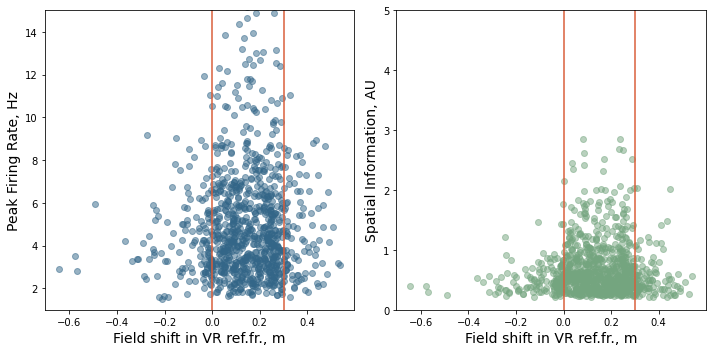

In [83]:
idxs = get_idxs_by_quality(shift_A_B_all)
shifts = np.array(shift_A_B_all[idxs]['shift'])
PFR_avg = (np.array(shift_A_B_all[idxs]['peak_FR_A']) + np.array(shift_A_B_all[idxs]['peak_FR_B'])) / 2
SIC_avg = (np.array(shift_A_B_all[idxs]['sic_A']) + np.array(shift_A_B_all[idxs]['sic_B'])) / 2


fig = figure(figsize=(10, 5))

ax = fig.add_subplot(121)
ax.scatter(shifts, PFR_avg, alpha=0.5, color=COLORS['a'])
ax.set_ylim(1, 15)
ax.axvline(0, color=COLORS['b'])
ax.axvline(0.3, color=COLORS['b'])
ax.set_xlabel('Field shift in VR ref.fr., m', fontsize=14)
ax.set_ylabel('Peak Firing Rate, Hz', fontsize=14)

ax = fig.add_subplot(122)
ax.scatter(shifts, SIC_avg, alpha=0.5, color=COLORS['c'])
ax.set_ylim(0, 5)
ax.axvline(0, color=COLORS['b'])
ax.axvline(0.3, color=COLORS['b'])
ax.set_xlabel('Field shift in VR ref.fr., m', fontsize=14)
ax.set_ylabel('Spatial Information, AU', fontsize=14)

fig.tight_layout()

In [101]:
cm(0.921)

(0.6568627450980392, 0.0, 0.0, 1.0)

## Distribution of PF shift depending on arena location

Does not REALLY show anything

In [116]:
#mid_Y_idxs = np.where( (data_s[:, 6] > -0.15) & (data_s[:, 6] < 0.45) )[0]
from functools import reduce

idxs_filt = reduce(np.intersect1d, [idxs_ic, idxs_fr, idxs_id])
idxs_0_ =  np.intersect1d(idxs_filt, idxs_0)
idxs_15_ =  np.intersect1d(idxs_filt, idxs_15)
idxs_30_ =  np.intersect1d(idxs_filt, idxs_30)

# normalized opacity
c_min = data_s[idxs_filt][:, 6].min()
opacity = (data_s[idxs_filt][:, 6] + abs(c_min))
opacity = opacity/np.max(opacity)
opacity = -opacity + np.max(opacity)

# set cmap if needed
#plt.set_cmap('gray')
#plt.set_cmap('jet')

fig = figure(figsize=(10, 10))

ax = fig.add_subplot(121)
ax.scatter(data_s[idxs_filt][:, 14], data_s[idxs_filt][:, 15], c=opacity, s=100)
ax.grid(True)

ax = fig.add_subplot(122)
ax.scatter(data_s[idxs_0_][:, 14], data_s[idxs_0_][:, 15], c=color_d, alpha=0.2, s=500)
ax.scatter(data_s[idxs_30_][:, 14], data_s[idxs_30_][:, 15], c=color_a, alpha=0.2, s=500)
ax.grid(True)

NameError: name 'idxs_ic' is not defined

## Remapping near borders (appear / disappear)

In [117]:
# existing only in condition A
idxs_ra_only = np.where((data_ra[:, 15] < -0.45))[0]

# existing only in condition B
idxs_rb_only = np.where((data_rb[:, 17] > 0.8))[0]

# sic > 0.2 only, firing rate > 2 Hz
idxs_ra_ic = np.where((data_ra[:, 7] > 0.2) & (data_ra[:, 11] > 2))[0]

# sic > 0.2 only, firing rate > 2 Hz
idxs_rb_ic = np.where((data_rb[:, 8] > 0.2) & (data_rb[:, 12] > 2))[0]

NameError: name 'data_ra' is not defined

In [35]:
idxs_filt_a = np.intersect1d(idxs_ra_only, idxs_ra_ic)
idxs_filt_b = np.intersect1d(idxs_rb_only, idxs_rb_ic)

def render_out(row):
    return "%s:%s, %d-%d_%d-%d, dY: %.2f, Y: %.2f" % (row[0], row[1], row[2], row[3], row[4], row[5], row[8], row[19])

#print('\n'.join([render_out(remapped_B[i]) for i in idxs_filt_b]))

In [106]:
idxs_0_to_plot = np.where((data_s[:, 6] > 0 - 0.05) & (data_s[:, 6] < 0 + 0.05))[0]
idxs_30_to_plot = np.where((data_s[:, 6] > 0.3 - 0.1) & (data_s[:, 6] < 0.3 + 0.0))[0]

idxs_filt = reduce(np.intersect1d, [idxs_ic, idxs_fr, idxs_id, idxs_30_to_plot])

filtered = [data_full[i] for i in idxs_filt]
to_link = [(item[0], item[1], item[2], item[3]) for item in filtered]

dest_folder = '/home/andrey/storage2/andrey/data/projects/24_shift/arena_locked'
create_symlinks(dest_folder, source, to_link)
#to_link

## Loosing interest to VR objects with time

by showing that occupancy near objects drops within the session? across sessions?

## arena position in time

why 30 seconds? to avoid time bias

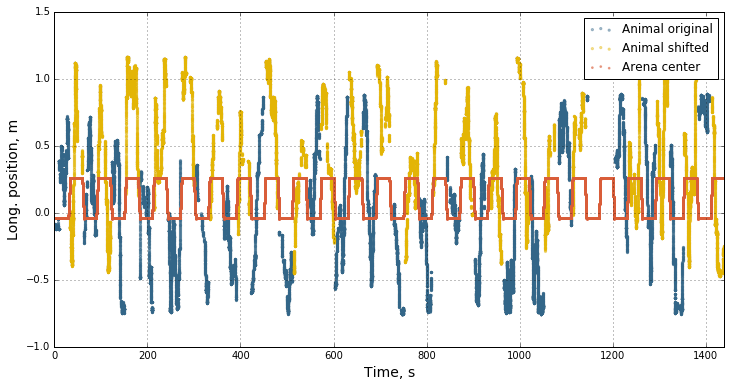

In [11]:
ex_animal = '003909'
ex_session = '2020-03-27_18-41-37'

sessionpath = os.path.join(source, ex_animal, ex_session)
h5file = os.path.join(sessionpath, 'all.h5')
with h5py.File(h5file, 'r') as f:
    arena_traj = np.array(f['arena_trajectory'])
    animal_traj = np.array(f['animal_trajectory'])
    idxs_A = np.array(f['A_indexes'])
    idxs_B = np.array(f['B_indexes'])
    
    if 'Ad_indexes' in f:  # if dark period present
        idxs_A = np.concatenate([idxs_A, np.array(f['Ad_indexes'])])
        idxs_B = np.concatenate([idxs_B, np.array(f['Bd_indexes'])])
    
    unit_groups = [x for x in f['units']]


fig = figure(figsize=(12, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time, s', fontsize=14)
ax.set_ylabel('Long. position, m', fontsize=14)
ax.set_xlim(0, arena_traj[-1][0] - arena_traj[0][0])
ax.grid(True)

ax.scatter(animal_traj[idxs_A][:, 0] - arena_traj[0][0], animal_traj[idxs_A][:, 2], alpha=0.4, s=5, color=color_a, label='Animal original')
ax.scatter(animal_traj[idxs_B][:, 0] - arena_traj[0][0], animal_traj[idxs_B][:, 2], alpha=0.4, s=5, color=color_d, label='Animal shifted')
ax.scatter(arena_traj[:, 0] - arena_traj[0][0], arena_traj[:, 2], alpha=0.5, s=3, color=color_b, label='Arena center')
ax.legend()

filename = "%s_%s_arena_positions.png" % (ex_animal, ex_session)
fig.savefig(os.path.join(paper, filename))

## example neurons

In [139]:
def spiking_plot(pos, traj_idxs, spk_idxs, inf, spa, sel, sic, coh):
    ax = fig.add_subplot(pos)
    ax.set_ylabel('Longitude, m')
    ax.grid(True)
    ax.set_xlim(limits[0], limits[1])
    ax.set_ylim(limits[2], limits[3])
    ax.scatter(trajectory[traj_idxs][:, 1], trajectory[traj_idxs][:, 2], alpha=0.05, color='#B4B8AB')
    ax.scatter(trajectory[spk_idxs][:, 1], trajectory[spk_idxs][:, 2], color=color_a)
    ax.text(limits[1] - 0.55, limits[3] - 0.1, 'spa=%.2f' % spa, fontsize=14)
    ax.text(limits[1] - 0.55, limits[3] - 0.25, 'sic=%.2f' % sic, fontsize=14)
    
    # VR scene schematic
    img = plt.imread(os.path.join(assets, "arena_line.png"))
    ax.imshow(img, extent=[limits[0] + 0.05, limits[0] + 0.25, limits[2] + 0.05, limits[3] - 0.05])
    return ax

def field_plot(pos, pf, vmax):
    axA = fig.add_subplot(pos)
    axA.set_xlabel('Latitude, m')
    axA.set_ylabel('Longitude, m')
    axA.grid(True)
    axA.set_xlim(limits[0], limits[1])
    axA.set_ylim(limits[2], limits[3])
    posPFA = axA.imshow(pf.T, cmap='jet', origin='lower', extent=extent, vmax=vmax)

    # VR scene schematic
    img = plt.imread(os.path.join(assets, "arena_line.png"))
    axA.imshow(img, extent=[limits[0] + 0.05, limits[0] + 0.25, limits[2] + 0.05, limits[3] - 0.05])
    return axA


# put showcase units here
selection = [
    "00910_2019-07-21_17-01-34_3_6",   # VR bars
    "00908_2019-07-09_08-49-24_7_3",   # VR bars / new area
    "003281_2019-11-05_20-11-18_7_6",  # VR bars / new area
    "00908_2019-07-08_17-46-20_6_4",   # VR borders
    "00908_2019-07-08_17-46-20_6_3",   # VR borders
    "003281_2019-11-21_22-51-03_7_2",  # VR floor
    "00908_2019-07-09_17-00-25_6_6",   # VR floor
    "00908_2019-07-22_22-25-02_2_3",   # Arena
    "00908_2019-07-24_11-17-34_3_4"    # Arena
]

selected_units = []
for line in selection:
    data = line.split('_')
    selected_units.append([
        data[0], data[1] + '_' + data[2], data[3], data[4]
    ])
    
dest_folder = '/home/andrey/storage2/andrey/data/projects/24_shift/zSHOWCASE/physical'

for i, (animal, session_id, electrode, unit) in enumerate(selected_units):
    sessionpath = os.path.join(source, animal, session_id)
    h5file = os.path.join(sessionpath, 'all.h5')
    with h5py.File(h5file, 'r') as f:
        trajectory = np.array(f['animal_trajectory'])

    conditions = ['A', 'B']
    spec2 = gridspec.GridSpec(ncols=len(conditions), nrows=2)
    fig = figure(figsize=(6, 9))
    limits = get_figure_size(trajectory[:, 1:3], border=0.05)
    limits = [-0.9, 0.4, limits[2], limits[3]]

    # first compute maximum peak firing rate to normalize field plots
    fr_all = []
    for j, cond in enumerate(conditions):
        with h5py.File(h5file, 'r') as f:
            unit_group = f['units']['%s_%s' % (electrode, unit)]
            fr_all.append(np.array(unit_group[cond+'_place_field']).max())
                
    for j, cond in enumerate(conditions):
        # reading data
        with h5py.File(h5file, 'r') as f:

            trajectory = np.array(f['animal_trajectory'])
            unit_groups = [x for x in f['units']]

            unit_group = f['units']['%s_%s' % (electrode, unit)]

            pos_firing = np.array(unit_group['trajectory_indexes'])

            mean_firing_rate = unit_group.attrs['mean_firing_rate'][0]
            burst_index = unit_group.attrs['burst_index'][0]
            isolation_distance = unit_group.attrs['isolation_distance'][0]
            traj_indexes = np.array(f[cond+'_indexes'])
            pf = np.array(unit_group[cond+'_place_field'])

            inf = unit_group[cond+'_place_field'].attrs['information']
            spa = unit_group[cond+'_place_field'].attrs['sparsity']
            sel = unit_group[cond+'_place_field'].attrs['selectivity']
            sic = unit_group[cond+'_place_field'].attrs['information_content']
            coh = unit_group[cond+'_place_field'].attrs['spatial_coherence']

            fmap = np.array(unit_group[cond+'_firing'])
            fields = np.array(unit_group[cond+'_fields'])
            COM = np.array(unit_group[cond+'_fields_COMs']) if cond+'_fields_COMs' in unit_group else None
            extent = np.array(unit_group.attrs['xy_range'])

        vmax = np.array(fr_all).max()
        
        # spiking + trajectories
        ax1 = spiking_plot(spec2[0, j], traj_indexes, np.intersect1d(pos_firing, traj_indexes), inf, spa, sel, sic, coh)
        if j == 1:
            labels = [item.get_text() for item in ax1.get_xticklabels()]
            empty_string_labels = ['']*len(labels)
            ax1.set_yticklabels(empty_string_labels)

        # place fields
        ax2 = field_plot(spec2[1, j], pf, vmax)
        if j == 1:
            labels = [item.get_text() for item in ax2.get_xticklabels()]
            empty_string_labels = ['']*len(labels)
            ax2.set_yticklabels(empty_string_labels)
    
    fig.tight_layout()
    filename = "%s_%s_%s_%s.png" % (animal, session_id, electrode, unit)
    fig.savefig(os.path.join(os.path.join(dest_folder), filename))
    
    plt.close(fig)
    plt.clf()

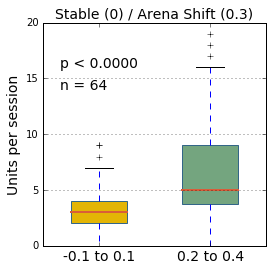

In [75]:
st, pval = stats.ttest_ind(num_per_session[:, 0], num_per_session[:, 1])

medianprops = dict(linestyle='-', linewidth=2, color=color_b)
boxprops = dict(linestyle='-', linewidth=1, color=color_a)

fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.set_title('Stable (0) / Arena Shift (0.3)', fontsize=14)
bplot = ax.boxplot([ num_per_session[:, 0], num_per_session[:, 1] ], widths=0.5, patch_artist=True, medianprops=medianprops, boxprops=boxprops)
ax.set_xticklabels(['-0.1 to 0.1', '0.2 to 0.4'], fontsize=14)
ax.set_ylabel('Units per session', fontsize=14)
ax.text(0.65, 16, 'p < %.4f' % pval, fontsize=14)
ax.text(0.65, 14, 'n = %d' % len(num_per_session), fontsize=14)


# patching colors
colors = [color_d, color_c]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)

filename = "shift_boxplot_physical.png"
fig.savefig(os.path.join(os.path.join(paper), filename))

## Distribution of fields is not a sum of gaussians

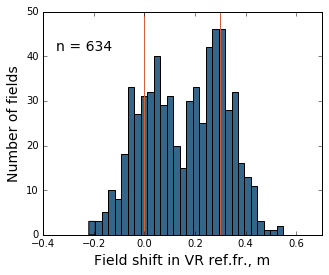

In [53]:
mu1, sigma1 = 0, 0.082
s1 = np.random.normal(mu1, sigma1, int((len(units_vpc)/total_non_mm) * total) )

mu2, sigma2 = 0.28, 0.082
s2 = np.random.normal(mu2, sigma2, int((len(units_bpc)/total_non_mm) * total) )

bins = 30
comb = np.concatenate([s1, s2])

# histogram of COM shifts
fig = figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_xlim(-0.4, 0.7)
ax.hist(comb, bins, color=COLORS['a'])
ax.axvline(0, color=COLORS['b'])
ax.axvline(0.3, color=COLORS['b'])
ax.set_xlabel('Field shift in VR ref.fr., m', fontsize=14)
ax.set_ylabel('Number of fields', fontsize=14)
ax.text(-0.35, 0.9 * np.histogram(comb, bins)[0].max(), 'n = %d' % len(comb), fontsize=14)

filename = "shift_sum_of_gaussians.png"
fig.savefig(os.path.join(os.path.join(paper), filename))

In [58]:
# number of cases when 33% of fields fall in the MM middle group

count = 0
for i in range(10000):
    mu1, sigma1 = 0, 0.082
    s1 = np.random.normal(mu1, sigma1, int((len(units_vpc)/total_non_mm) * total) )

    mu2, sigma2 = 0.28, 0.082
    s2 = np.random.normal(mu2, sigma2, int((len(units_bpc)/total_non_mm) * total) )
    
    comb = np.concatenate([s1, s2])
    
    mid_grp = comb[(comb > 0.075) & (comb < 0.225)]

    if len(mid_grp) > len(units_mmpc):
        count += 1

count

0

[-0.37908302887087386, 0.3973505090424715]
[-0.8298421061622976, 0.8298421061622975]
0.7764335379133454 1.6596842123245952


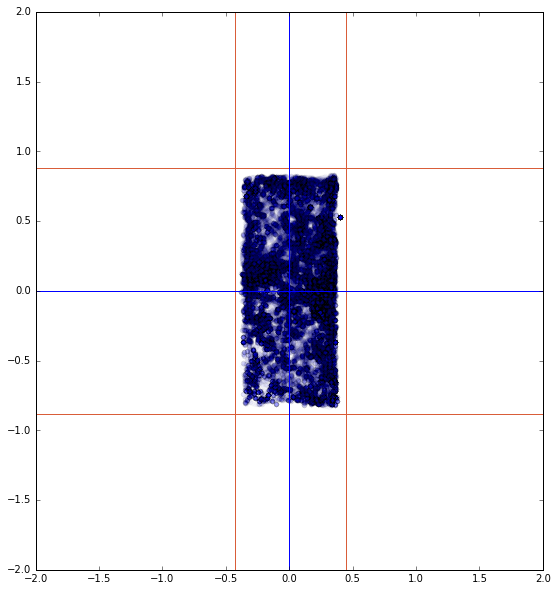

In [98]:
example_animal = '005363'
example_session = '2020-10-13_21-28-55'

#filebase = 'results'
filebase = 'all'

h5file = os.path.join(source, example_animal, example_session, '%s.h5' % filebase)

with h5py.File(h5file, 'r') as f:
    trajectory = np.array(f['animal_trajectory'])
    arena_traj = np.array(f['arena_trajectory'])
    running_idxs = np.array(f['running_idxs'])

# fake outside indexes
#for i in range(100):
#    trajectory[i + 1000][1] = 0.5

def get_minmax(data, delta_min, delta_max):
    vals, periods = np.histogram(data, 50)  # position distribution
    selected= []
    check_max = True

    for i, curr_per in enumerate(periods[:-1]):
        if check_max and vals[i] > 100 or not check_max and vals[i] < 100:
            selected.append(curr_per)
            check_max = not check_max

    if len(selected) % 2 > 0:
        selected.append(periods[-1])

    print(selected)
        
    for i in range(int(len(selected)/2)):
        delta = selected[i*2 + 1] - selected[i*2]
        if delta_min < delta < delta_max:
            return selected[i*2], selected[i*2 + 1]

    raise ValueError("Positions outside arena could not be detected.")

delta = 0.05  # 10 cm larger than arena
x_min, x_max = get_minmax(trajectory[:, 1], 0.6, 0.85)
y_min, y_max = get_minmax(trajectory[:, 2], 1.4, 2.0)

idxs_inside_x = np.where((trajectory[:, 1] < x_max + delta) & (trajectory[:, 1] > x_min - delta))[0]
idxs_inside_y = np.where((trajectory[:, 2] < y_max + delta) & (trajectory[:, 1] > y_min - delta))[0]
idxs_inside = np.intersect1d(idxs_inside_x, idxs_inside_y)
idxs_outside = np.setdiff1d(np.arange(len(trajectory)), idxs_inside)

print(x_max - x_min, y_max - y_min)

fig = figure(figsize=(20, 10))  

ax = fig.add_subplot(121)
ax.scatter(trajectory[:, 1], trajectory[:, 2], alpha=0.01)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)


ax.axvline(x_min - delta, color=COLORS['b'])
ax.axvline(x_max + delta, color=COLORS['b'])
ax.axhline(y_min - delta, color=COLORS['b'])
ax.axhline(y_max + delta, color=COLORS['b'])
ax.axvline(0)
ax.axhline(0)


In [ ]:
example_animal = '005363'
example_session = '2020-10-13_21-28-55'

#filebase = 'results'
filebase = 'all'

h5file = os.path.join(source, example_animal, example_session, '%s.h5' % filebase)

with h5py.File(h5file, 'r') as f:
    trajectory = np.array(f['animal_trajectory'])
    arena_traj = np.array(f['arena_trajectory'])
    running_idxs = np.array(f['running_idxs'])

# fake outside indexes
#for i in range(100):
#    trajectory[i + 1000][1] = 0.5

def get_minmax(data, delta_min, delta_max):
    vals, periods = np.histogram(data, 50)  # position distribution
    selected= []
    check_max = True

    for i, curr_per in enumerate(periods[:-1]):
        if check_max and vals[i] > 100 or not check_max and vals[i] < 100:
            selected.append(curr_per)
            check_max = not check_max

    if len(selected) % 2 > 0:
        selected.append(periods[-1])

    print(selected)
        
    for i in range(int(len(selected)/2)):
        delta = selected[i*2 + 1] - selected[i*2]
        if delta_min < delta < delta_max:
            return selected[i*2], selected[i*2 + 1]

    raise ValueError("Positions outside arena could not be detected.")

delta = 0.05  # 10 cm larger than arena
x_min, x_max = get_minmax(trajectory[:, 1], 0.6, 0.85)
y_min, y_max = get_minmax(trajectory[:, 2], 1.4, 2.0)

idxs_inside_x = np.where((trajectory[:, 1] < x_max + delta) & (trajectory[:, 1] > x_min - delta))[0]
idxs_inside_y = np.where((trajectory[:, 2] < y_max + delta) & (trajectory[:, 1] > y_min - delta))[0]
idxs_inside = np.intersect1d(idxs_inside_x, idxs_inside_y)
idxs_outside = np.setdiff1d(np.arange(len(trajectory)), idxs_inside)

print(x_max - x_min, y_max - y_min)

fig = figure(figsize=(20, 10))  

ax = fig.add_subplot(121)
ax.scatter(trajectory[:, 1], trajectory[:, 2], alpha=0.01)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)


ax.axvline(x_min - delta, color=COLORS['b'])
ax.axvline(x_max + delta, color=COLORS['b'])
ax.axhline(y_min - delta, color=COLORS['b'])
ax.axhline(y_max + delta, color=COLORS['b'])
ax.axvline(0)
ax.axhline(0)


In [17]:
def get_match_idxs(dataset, row):
    idxs_1 = (dataset['session'] == row['session'])
    idxs_2 = (dataset['electrode'] == row['electrode'])
    idxs_3 = (dataset['unit'] == row['unit'])
    idxs_4 = (dataset['field_A'] == row['field_A'])
    return idxs_1 & idxs_2 & idxs_3 & idxs_4

def get_matching_fields(df_AB, df_BC, df_AC):
    match_both = []
    match_A_D = []
    match_B_D = []
    match_none = []

    for i, row in df_AB[get_idxs_by_quality(df_AB)].iterrows():
        # for each matched pair in light (A, B) search for pair in dark (A, Ad and B, Bd)
        idxs_A = get_match_idxs(df_AC, row)
        idxs_B = get_match_idxs(df_BC, row)

        if idxs_A.any() and idxs_B.any():
            match_both.append([row['shift'], df_AC[idxs_A].iloc[0]['shift']])
        elif idxs_A.any():
            match_A_D.append(row['shift'])
        elif idxs_B.any():
            match_B_D.append(row['shift'])
        else:
            match_none.append(row['shift'])
            
    return match_both, match_A_D, match_B_D, match_none

[62, 29, 96]
[126, 35, 18]


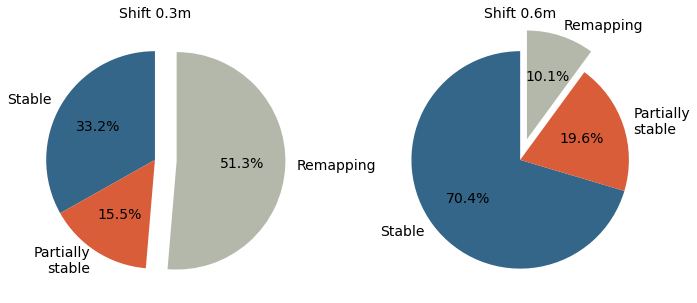

In [18]:
fig = figure(figsize=(12, 5))

series = [
    (shift_A_B_short, shift_B_D_short, shift_A_D_short),
    (shift_A_B_long, shift_B_D_long, shift_A_D_long)
]
titles = ['Shift 0.3m', 'Shift 0.6m']

for i, (df_AB, df_BD, df_AD) in enumerate(series):
    ax = fig.add_subplot(1, 2, i+1)

    match_both, match_A_D, match_B_D, match_none = get_matching_fields(df_AB, df_BD, df_AD)
    data = [len(match_both), len(match_A_D) + len(match_B_D), len(match_none)]
    labels = 'Stable', 'Partially\nstable', 'Remapping'
    colors = [COLORS['a'], COLORS['b'], COLORS['f']]
    explode = (0, 0, 0.2)

    wedges, labels, autopct = ax.pie(data, explode=explode, colors=colors, labels=labels, \
                 autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90)
    ax.set_title(titles[i], fontsize=14)
    for lab in labels:
        lab.set_fontsize(14)
        
    print(data)